In [39]:
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)
library(broom)
library(digest)

In [40]:
install.packages("janitor")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [41]:
library(janitor)

In [42]:
url <- "https://geodash.vpd.ca/opendata/crimedata_download/crimedata_csv_all_years.zip"
filename <- "crime_data.zip"
download.file(url, destfile = filename)

# Data comes in as a zip, so we'll need to extract it
unzip("crime_data.zip")

# Read in the desired file
crime_data <- read_csv("crimedata_csv_all_years.csv")
head(crime_data)

theft_crimes <- c("Other Theft", "Theft from Vehicle", 
                  "Theft of Bicycle", "Theft of Vehicle")

Parsed with column specification:
cols(
  TYPE = col_character(),
  YEAR = col_double(),
  MONTH = col_double(),
  DAY = col_double(),
  HOUR = col_double(),
  MINUTE = col_double(),
  HUNDRED_BLOCK = col_character(),
  NEIGHBOURHOOD = col_character(),
  X = col_double(),
  Y = col_double()
)



TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Break and Enter Commercial,2012,12,14,8,52,NA,Oakridge,491285.0,5453433
Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490613.0,5457110
Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491007.8,5459174
Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.9,5459166
Break and Enter Commercial,2020,7,28,19,12,10XX ALBERNI ST,West End,491015.9,5459166
Break and Enter Commercial,2005,11,14,3,9,10XX ALBERNI ST,West End,491021.4,5459161


In [43]:
crime_data <- crime_data %>% clean_names()
head(crime_data)

type,year,month,day,hour,minute,hundred_block,neighbourhood,x,y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Break and Enter Commercial,2012,12,14,8,52,NA,Oakridge,491285.0,5453433
Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490613.0,5457110
Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491007.8,5459174
Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.9,5459166
Break and Enter Commercial,2020,7,28,19,12,10XX ALBERNI ST,West End,491015.9,5459166
Break and Enter Commercial,2005,11,14,3,9,10XX ALBERNI ST,West End,491021.4,5459161


In [44]:
total_rows <- crime_data %>% nrow()
print(sprintf("There are %d rows in the data frame", total_rows))

na_neighbourhoods <- sum(is.na(crime_data$neighbourhood))
print(sprintf("Originally, there were %d NA values in the neighbourhood column", na_neighbourhoods))

crime_data <- na.omit(crime_data)

na_neighbourhoods <- sum(is.na(crime_data$neighbourhood))
print(sprintf("Now, there are %d NA values in the neighbourhood column", na_neighbourhoods))

[1] "There are 668167 rows in the data frame"
[1] "Originally, there were 70135 NA values in the neighbourhood column"
[1] "Now, there are 0 NA values in the neighbourhood column"


In [45]:
crime_data <- crime_data %>% 
    select(type, year, neighbourhood) %>%
    filter(2017 <= year & year <= 2020)
head(crime_data)

type,year,neighbourhood
<chr>,<dbl>,<chr>
Break and Enter Commercial,2019,Fairview
Break and Enter Commercial,2019,West End
Break and Enter Commercial,2020,West End
Break and Enter Commercial,2017,West End
Break and Enter Commercial,2018,West End
Break and Enter Commercial,2020,West End


In [46]:
crime_data <- crime_data %>%
    mutate(type = as_factor(type)) %>%
    mutate(neighbourhood = as_factor(neighbourhood))
head(crime_data)

type,year,neighbourhood
<fct>,<dbl>,<fct>
Break and Enter Commercial,2019,Fairview
Break and Enter Commercial,2019,West End
Break and Enter Commercial,2020,West End
Break and Enter Commercial,2017,West End
Break and Enter Commercial,2018,West End
Break and Enter Commercial,2020,West End


So far, all codes are from the project proposal.

A proportion is the average of a random variable that can only assume either 0 or 1. Therefore, by calculating proportions, we are summing up random terms. Also, the sample size is large, n*p≥10 and n*(1-p)≥10. In order to make sure the independence, sample size should be less than 10% of the population size.

Then, we can apply the CLT.

Let's compute the confidence interval based on Central Limit Theorem.

In [47]:
crime_data_past <- crime_data %>%
        filter(year %in% c(2017, 2018, 2019))
head(crime_data_past)

type,year,neighbourhood
<fct>,<dbl>,<fct>
Break and Enter Commercial,2019,Fairview
Break and Enter Commercial,2019,West End
Break and Enter Commercial,2017,West End
Break and Enter Commercial,2018,West End
Break and Enter Commercial,2018,West End
Break and Enter Commercial,2017,West End


In [48]:
prop_past <- crime_data_past %>%
    group_by(neighbourhood) %>%
    summarize(prop_p = mean(type %in% theft_crimes),
              count_p = sum(type %in% theft_crimes),
              n_past = n()) 

head(prop_past)

`summarise()` ungrouping output (override with `.groups` argument)



neighbourhood,prop_p,count_p,n_past
<fct>,<dbl>,<int>,<int>
Fairview,0.6891537,3933,5707
West End,0.7351588,6712,9130
Central Business District,0.7533982,24997,33179
Hastings-Sunrise,0.6451613,2500,3875
Strathcona,0.5577118,3305,5926
Grandview-Woodland,0.6237392,3463,5552


In [49]:
crime_data_2020 <- crime_data %>%
        filter(year==2020)
head(crime_data_2020)

type,year,neighbourhood
<fct>,<dbl>,<fct>
Break and Enter Commercial,2020,West End
Break and Enter Commercial,2020,West End
Break and Enter Commercial,2020,West End
Break and Enter Commercial,2020,West End
Break and Enter Commercial,2020,West End
Break and Enter Commercial,2020,West End


In [50]:
prop_2020 <- crime_data_2020 %>%
    group_by(neighbourhood) %>%
    summarize(prop_20 = mean(type %in% theft_crimes),
              count_20 = sum(type %in% theft_crimes),
              n_20 = n())


head(prop_2020)

`summarise()` ungrouping output (override with `.groups` argument)



neighbourhood,prop_20,count_20,n_20
<fct>,<dbl>,<int>,<int>
Fairview,0.6194740,1107,1787
West End,0.6331310,1460,2306
Central Business District,0.6046934,4664,7713
Hastings-Sunrise,0.5693642,591,1038
Strathcona,0.4385246,749,1708
Grandview-Woodland,0.5506849,804,1460


In [51]:
# merge two tables
merge_past_2020 <- left_join(prop_past, prop_2020, by = "neighbourhood")
head(merge_past_2020)

neighbourhood,prop_p,count_p,n_past,prop_20,count_20,n_20
<fct>,<dbl>,<int>,<int>,<dbl>,<int>,<int>
Fairview,0.6891537,3933,5707,0.6194740,1107,1787
West End,0.7351588,6712,9130,0.6331310,1460,2306
Central Business District,0.7533982,24997,33179,0.6046934,4664,7713
Hastings-Sunrise,0.6451613,2500,3875,0.5693642,591,1038
Strathcona,0.5577118,3305,5926,0.4385246,749,1708
Grandview-Woodland,0.6237392,3463,5552,0.5506849,804,1460


In [52]:
merge_past_2020 <- merge_past_2020 %>% 
    mutate(prop_diff = prop_20 - prop_p)

head(merge_past_2020)


neighbourhood,prop_p,count_p,n_past,prop_20,count_20,n_20,prop_diff
<fct>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>
Fairview,0.6891537,3933,5707,0.6194740,1107,1787,-0.06967969
West End,0.7351588,6712,9130,0.6331310,1460,2306,-0.10202785
Central Business District,0.7533982,24997,33179,0.6046934,4664,7713,-0.14870486
Hastings-Sunrise,0.6451613,2500,3875,0.5693642,591,1038,-0.07579713
Strathcona,0.5577118,3305,5926,0.4385246,749,1708,-0.11918719
Grandview-Woodland,0.6237392,3463,5552,0.5506849,804,1460,-0.07305426


In [53]:
merge_past_2020 <- merge_past_2020 %>%
    mutate(prop_sd = sqrt(prop_p*(1-prop_p)/n_past + 
                prop_20*(1-prop_20)/n_20))

head(merge_past_2020)

neighbourhood,prop_p,count_p,n_past,prop_20,count_20,n_20,prop_diff,prop_sd
<fct>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>
Fairview,0.6891537,3933,5707,0.6194740,1107,1787,-0.06967969,0.013017222
West End,0.7351588,6712,9130,0.6331310,1460,2306,-0.10202785,0.011047724
Central Business District,0.7533982,24997,33179,0.6046934,4664,7713,-0.14870486,0.006049078
Hastings-Sunrise,0.6451613,2500,3875,0.5693642,591,1038,-0.07579713,0.017184027
Strathcona,0.5577118,3305,5926,0.4385246,749,1708,-0.11918719,0.013630198
Grandview-Woodland,0.6237392,3463,5552,0.5506849,804,1460,-0.07305426,0.014551437


In [58]:
# Based on 90% confidence interval
theft_crime_prop_diff_ci_90 <- merge_past_2020 %>%
    mutate(
        lower_ci = merge_past_2020$prop_diff - qnorm(0.95) *
        merge_past_2020$prop_sd,
        upper_ci = merge_past_2020$prop_diff + qnorm(0.95) *
        merge_past_2020$prop_sd) %>%
    select(neighbourhood, lower_ci, upper_ci)

head(theft_crime_prop_diff_ci)

neighbourhood,lower_ci,upper_ci
<fct>,<dbl>,<dbl>
Fairview,-0.09519298,-0.04416640
West End,-0.12368100,-0.08037471
Central Business District,-0.16056083,-0.13684888
Hastings-Sunrise,-0.10947720,-0.04211705
Strathcona,-0.14590189,-0.09247249
Grandview-Woodland,-0.10157455,-0.04453397


In [59]:
# Based on 95% confidence interval
theft_crime_prop_diff_ci_95 <- merge_past_2020 %>%
    mutate(
        lower_ci = merge_past_2020$prop_diff - qnorm(0.975) *
        merge_past_2020$prop_sd,
        upper_ci = merge_past_2020$prop_diff + qnorm(0.975) *
        merge_past_2020$prop_sd) %>%
    select(neighbourhood, lower_ci, upper_ci)

head(theft_crime_prop_diff_ci)

neighbourhood,lower_ci,upper_ci
<fct>,<dbl>,<dbl>
Fairview,-0.09519298,-0.04416640
West End,-0.12368100,-0.08037471
Central Business District,-0.16056083,-0.13684888
Hastings-Sunrise,-0.10947720,-0.04211705
Strathcona,-0.14590189,-0.09247249
Grandview-Woodland,-0.10157455,-0.04453397


In [61]:
#check if the intervals capture 0 based on 90% confidence interval
intervals_captured_90 <- theft_crime_prop_diff_ci_90 %>% 
    mutate(captured = (lower_ci <= 0 & 0 <= upper_ci))

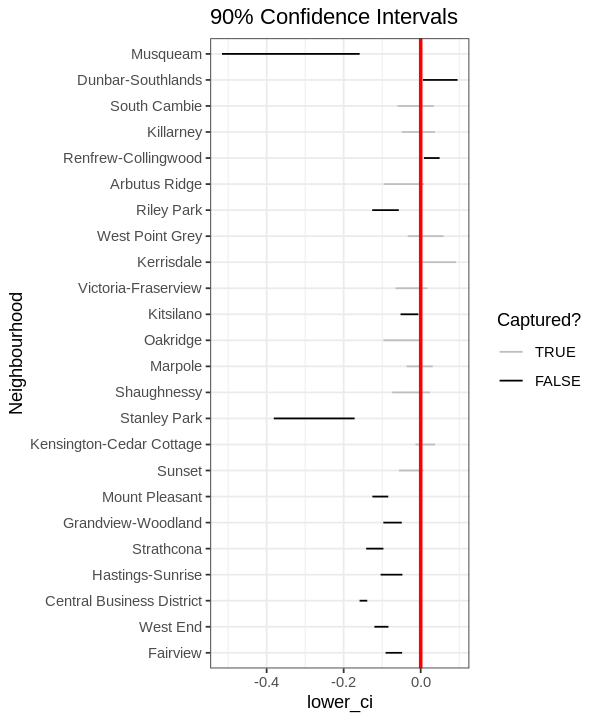

In [67]:
#Draw CI plot
options(repr.plot.width = 5, repr.plot.height = 6)


many_ci_plot_90 <- intervals_captured_90 %>%
    ggplot() +
    scale_colour_manual(breaks = c("TRUE", "FALSE"), # Change colour scale for better visibility.
                        values = c("grey", "black")) +
    geom_segment(aes(x = lower_ci,
                     xend = upper_ci,
                     y = neighbourhood,
                     yend = neighbourhood,
                     colour = captured)) +
    geom_vline(xintercept = 0, colour = "red", size = 1) +
    labs(title = "90% Confidence Intervals",
         y = "Neighbourhood",
         colour = "Captured?") +
    theme_bw() 
many_ci_plot_90

In [63]:
intervals_captured_95 <- theft_crime_prop_diff_ci_95 %>% 
    mutate(captured = (lower_ci <= 0 & 0 <= upper_ci))

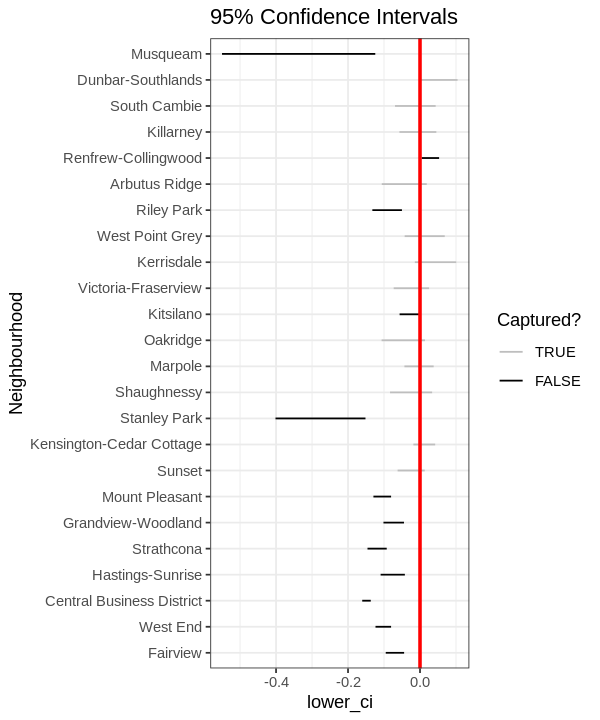

In [68]:
options(repr.plot.width = 5, repr.plot.height = 6)


many_ci_plot_95 <- intervals_captured_95 %>%
    ggplot() +
    scale_colour_manual(breaks = c("TRUE", "FALSE"), # Change colour scale for better visibility.
                        values = c("grey", "black")) +
    geom_segment(aes(x = lower_ci,
                     xend = upper_ci,
                     y = neighbourhood,
                     yend = neighbourhood,
                     colour = captured)) +
    geom_vline(xintercept = 0, colour = "red", size = 1) +
    labs(title = "95% Confidence Intervals",
         y = "Neighbourhood",
         colour = "Captured?") +
    theme_bw() 
many_ci_plot_95

Based on ci plot, if the confidence interval captures 0, it means there's no significant difference between crime rates of 2020 and before 2020. If the confidence interval doesn't capture 0, it means there's significant difference between crime rates of 2020 and before 2020. We can find that out of 24 neighbourhoods, there are 12 neighbourhoods captures 0, it means the crime rates of majority of the neighbourhoods have no significant changes.